### Lesson 12 Lab:  Feature Engineering the Bikeshare Dataset

### Step 1:  Load in the Dataset

In [176]:
import numpy as np
import pandas as pd

In [177]:
url = "/Users/theodoreplotkin/desktop/postmalone/GA_Data_Science/DAT-06-24/class material/Unit 3/data/bikeshare.csv"

bikes = pd.read_csv(url, index_col = 'datetime', parse_dates = True)

bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
datetime,,,,,,,,,
2011-01-01 00:00:00,Spring,0,0,Clear Skies,9.84,14.395,81,0.0,16
2011-01-01 01:00:00,Spring,0,0,Clear Skies,9.02,13.635,80,0.0,40
2011-01-01 02:00:00,Spring,0,0,Clear Skies,9.02,13.635,80,0.0,32
2011-01-01 03:00:00,Spring,0,0,Clear Skies,9.84,14.395,75,0.0,13
2011-01-01 04:00:00,Spring,0,0,Clear Skies,9.84,14.395,75,0.0,1


### Step 2: Transform Your Categorical Variables (If Necessary)

In [178]:
set(bikes["weather"])

def weather_encoding(row):
    if "Clear Skies" in row["weather"]:
        return 4
    elif "Partly Cloudy" in row["weather"]:
        return 3
    elif "Light Storms/Rain" in row["weather"]:
        return 2
    elif "Heavy Storms/Rain" in row["weather"]:
        return 1

bikes["weather_encoding"] = bikes.apply(weather_encoding, axis = 1 )

In [179]:
#bikes = pd.get_dummies(bikes, drop_first = True)

In [180]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,weather_encoding
datetime,,,,,,,,,,
2011-01-01 00:00:00,Spring,0,0,Clear Skies,9.84,14.395,81,0.0,16,4
2011-01-01 01:00:00,Spring,0,0,Clear Skies,9.02,13.635,80,0.0,40,4
2011-01-01 02:00:00,Spring,0,0,Clear Skies,9.02,13.635,80,0.0,32,4
2011-01-01 03:00:00,Spring,0,0,Clear Skies,9.84,14.395,75,0.0,13,4
2011-01-01 04:00:00,Spring,0,0,Clear Skies,9.84,14.395,75,0.0,1,4


In [181]:
#note weve set out index to be date time

### Step 3:  Extract Units of Time That You Feel Might Be Useful as New Columns

You can find all of the necessary ones here:  https://pandas.pydata.org/pandas-docs/version/0.24/reference/series.html#time-series-related

Or if you're using an index:  https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DatetimeIndex.html

In [182]:
bikes["hour"] = bikes.index.hour

In [183]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,weather_encoding,hour
datetime,,,,,,,,,,,
2011-01-01 00:00:00,Spring,0,0,Clear Skies,9.84,14.395,81,0.0,16,4,0
2011-01-01 01:00:00,Spring,0,0,Clear Skies,9.02,13.635,80,0.0,40,4,1
2011-01-01 02:00:00,Spring,0,0,Clear Skies,9.02,13.635,80,0.0,32,4,2
2011-01-01 03:00:00,Spring,0,0,Clear Skies,9.84,14.395,75,0.0,13,4,3
2011-01-01 04:00:00,Spring,0,0,Clear Skies,9.84,14.395,75,0.0,1,4,4


In [184]:
bikes["weekday"] = bikes.index.weekday #Monday = 0,... Sunday = 6

In [185]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,weather_encoding,hour,weekday
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,Spring,0,0,Clear Skies,9.84,14.395,81,0.0,16,4,0,5
2011-01-01 01:00:00,Spring,0,0,Clear Skies,9.02,13.635,80,0.0,40,4,1,5
2011-01-01 02:00:00,Spring,0,0,Clear Skies,9.02,13.635,80,0.0,32,4,2,5
2011-01-01 03:00:00,Spring,0,0,Clear Skies,9.84,14.395,75,0.0,13,4,3,5
2011-01-01 04:00:00,Spring,0,0,Clear Skies,9.84,14.395,75,0.0,1,4,4,5


In [186]:
X_data = bikes[["temp","humidity","windspeed","weather_encoding","hour","weekday"]]

In [187]:
X_data = (X_data - X_data.mean())/(X_data.std())

In [188]:
X_data.head() #now our data is standardized 

,temp,humidity,windspeed,weather_encoding,hour,weekday
datetime,,,,,,
2011-01-01 00:00:00,-1.333599,0.993167,-1.567682,0.660148,-1.668867,0.990747
2011-01-01 01:00:00,-1.438841,0.941206,-1.567682,0.660148,-1.524271,0.990747
2011-01-01 02:00:00,-1.438841,0.941206,-1.567682,0.660148,-1.379676,0.990747
2011-01-01 03:00:00,-1.333599,0.681399,-1.567682,0.660148,-1.235080,0.990747
2011-01-01 04:00:00,-1.333599,0.681399,-1.567682,0.660148,-1.090484,0.990747


In [189]:
X_data["holiday"] = bikes["holiday"]
X_data["workingday"] = bikes["workingday"]

In [190]:
X_data = pd.get_dummies(bikes.loc[:, (bikes.columns != "weather") & (bikes.columns != "count")], drop_first = True)

In [191]:
X_data.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'weather_encoding', 'hour', 'weekday', 'season_Spring', 'season_Summer',
       'season_Winter'],
      dtype='object')

In [192]:
X_data.head()

,holiday,workingday,temp,atemp,humidity,windspeed,weather_encoding,hour,weekday,season_Spring,season_Summer,season_Winter
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,4,0,5,1,0,0
2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,4,1,5,1,0,0
2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,4,2,5,1,0,0
2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,4,3,5,1,0,0
2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,4,4,5,1,0,0


In [193]:
y = bikes["count"]

In [194]:
#lets fit a model on all variables 

In [195]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [196]:
model1 = LinearRegression()

In [197]:
model1.fit(X_data.loc[:, X_data.columns != "atemp"] ,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [198]:
coeffs = pd.DataFrame({
    "Variable": X_data.loc[:, X_data.columns != "atemp"].columns,
    "Weight": model1.coef_    
}).sort_values(by = "Weight", ascending = False)

coeffs

,Variable,Weight
10,season_Winter,81.145733
9,season_Summer,28.925213
8,season_Spring,14.207192
2,temp,9.209250
6,hour,7.352413
5,weather_encoding,5.127577
1,workingday,1.226329
7,weekday,0.863789
4,windspeed,0.113844
3,humidity,-2.086550


In [199]:
model1.score(X_data.loc[:, X_data.columns != "atemp"],y)

0.34372834172375066

In [200]:
print("MAE:", metrics.mean_absolute_error(bikes["count"],model1.predict(X_data.loc[:, X_data.columns != "atemp"])) )

MAE: 108.18222562581948


In [201]:
bikes["prediction"] = model1.predict(X_data.loc[:, X_data.columns != "atemp"])

In [202]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,weather_encoding,hour,weekday,prediction
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,Spring,0,0,Clear Skies,9.84,14.395,81,0.0,16,4,0,5,-44.102911
2011-01-01 01:00:00,Spring,0,0,Clear Skies,9.02,13.635,80,0.0,40,4,1,5,-42.215533
2011-01-01 02:00:00,Spring,0,0,Clear Skies,9.02,13.635,80,0.0,32,4,2,5,-34.863119
2011-01-01 03:00:00,Spring,0,0,Clear Skies,9.84,14.395,75,0.0,13,4,3,5,-9.526370
2011-01-01 04:00:00,Spring,0,0,Clear Skies,9.84,14.395,75,0.0,1,4,4,5,-2.173957


### Step 4: Re-Run Your Model With the New Info, and Grab the Metric of Your Choice:  R_squared, MAE, or MSE

### (Bonus):  Create A New Column Called 'Daytime' That Returns 0 or 1 Depending on If It's Between 7 A.M. or 8 P.M. When The Ride Happens

In [203]:
#create a new column called "Daytime" returns 0 or 1 depending on if its between 7a.m. or 8 p.m.
def daytime(row):
    if row["hour"] in range(7,21):
        return 1
    else:
        return 0

bikes["daytime"] = bikes.apply(daytime, axis = 1)

In [204]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,weather_encoding,hour,weekday,prediction,daytime
datetime,,,,,,,,,,,,,,
2011-01-01 00:00:00,Spring,0,0,Clear Skies,9.84,14.395,81,0.0,16,4,0,5,-44.102911,0
2011-01-01 01:00:00,Spring,0,0,Clear Skies,9.02,13.635,80,0.0,40,4,1,5,-42.215533,0
2011-01-01 02:00:00,Spring,0,0,Clear Skies,9.02,13.635,80,0.0,32,4,2,5,-34.863119,0
2011-01-01 03:00:00,Spring,0,0,Clear Skies,9.84,14.395,75,0.0,13,4,3,5,-9.526370,0
2011-01-01 04:00:00,Spring,0,0,Clear Skies,9.84,14.395,75,0.0,1,4,4,5,-2.173957,0


In [205]:
X_data["daytime"] = bikes["daytime"]

In [206]:
model2 = LinearRegression()

In [207]:
model2.fit(X_data.loc[:, (X_data.columns != "atemp")],y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [208]:
coeffs = pd.DataFrame({
    "Variable": X_data.loc[:, (X_data.columns != "atemp")].columns,
    "Weight": model2.coef_    
}).sort_values(by = "Weight", ascending = False)

coeffs

,Variable,Weight
11,daytime,172.837282
10,season_Winter,46.132972
5,weather_encoding,23.327514
9,season_Summer,18.723992
2,temp,6.378508
1,workingday,5.062892
6,hour,4.733877
7,weekday,1.167937
4,windspeed,-0.757732
3,humidity,-0.857745


In [209]:
model2.score(X_data.loc[:, (X_data.columns != "atemp")],y) #notice the improvement in the Rsquare

0.5146087791610869

In [210]:
print("MAE:", metrics.mean_absolute_error(bikes["count"],model2.predict(X_data.loc[:, (X_data.columns != "atemp")])) )
#notice a smaller MAE than before adding the "daytime" indicator variable

MAE: 91.84267170736457


In [175]:
import statsmodels.api as sm

mod = sm.OLS(y, X_data.loc[:, (X_data.columns != "atemp")])
results = mod.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     3025.
Date:                Wed, 31 Jul 2019   Prob (F-statistic):               0.00
Time:                        22:11:52   Log-Likelihood:                -68144.
No. Observations:               10886   AIC:                         1.363e+05
Df Residuals:                   10874   BIC:                         1.364e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
holiday            -18.1192      8.668  

### Check To See If Your Model Improved

### (Bonus):  Analyze Your Residuals

##### 1).  Pull A Histogram

In [212]:
#lets get the RESIDUALS

residuals = bikes["count"] - bikes["prediction"]

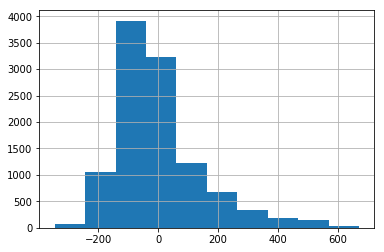

In [213]:
residuals.hist()

##### 2). Evaluate the Mean and Standard Deviation of Your Residuals

In [216]:
residuals.std()

146.74620075752264

In [215]:
residuals.mean()

-5.668937873069651e-14

In [218]:
import seaborn as sns

##### 3).  Use Seaborn's lmplot to Your Errors Against the Predicted Value:  Is There An Inherent Pattern?